# 데이터 증강(Augmentation)을 사용하여 CNN 학습
* Overfitting 대응책

## Import Tensorflow & Keras

* TensorFlow Version 지정

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

'1.15.0'

* GPU 설정 확인

In [0]:
print('GPU Information -', tf.test.gpu_device_name(), '\n')

!nvidia-smi

GPU Information - /device:GPU:0 

Sun Nov 24 00:38:58 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    31W / 250W |   1577MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                          

* Keras Version 확인

In [0]:
import keras
keras.__version__

'2.2.5'

# I. Colab File Upload

> ## 1) 'dogs_and_cats_small.zip' 파일을 Colab에 업로드 후 진행
* 약 8분

In [0]:
!ls

dogs_and_cats_small.zip  drive	sample_data  test  train  validation


> ## 2) unzip

In [0]:
!unzip dogs_and_cats_small.zip

In [0]:
!ls

dogs_and_cats_small.zip  sample_data  test  train  validation


> ## 3) [Option] Image Augmentation Test

* rotation_range = 40 : 0도에서 40도 사이에서 임의의 각도록 회전
* width_shift_range = 0.2 : 20% 픽셀 내외로 좌우 이동
* height_shift_range = 0.2 : 20% 픽셀 내외로 상하 이동
* shear_range = 0.2 : 0.2 라디안 내외로 시계 반대방향으로 변형
* zoom_range = 0.2 : 80%에서 120% 범위에서 확대/축소
* horizontal_flip = True : 수평방향 뒤집기
* vertical_flip = True : 수직방향 뒤집기
* fill_mode = 'nearest' : 주변 픽셀로 이미지 채우기

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip = True,
                             fill_mode = 'nearest')

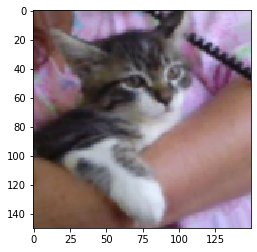

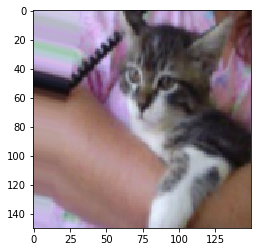

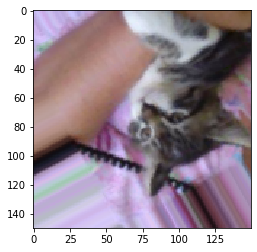

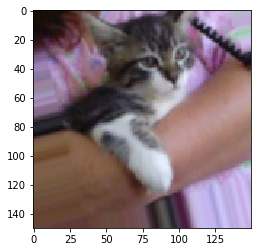

In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os

train_cats_dir = train_dir = os.path.join('train', 'cats')
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 테스트 이미지 선택
img_path = fnames[77]

# 이미지 읽고 크기 변경
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 배열 변환
x = image.img_to_array(img)

# (1, 150, 150, 3) 변환
x = x.reshape((1,) + x.shape)

# 랜덤하게 변환된 이미지 배치 생성
i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

# II. Data Preprocessing

> ## 1) Image_File Directory Setting

* train_dir
* validation_dir
* test_dir

In [0]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

> ## 2) ImageDataGenerator( )

* Normalization & Augmentaion
 * ImageDataGenerator( )
* Resizing
 * flow_from_directory( )

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# With Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   vertical_flip = True,
                                   fill_mode = 'nearest')

# Without Augmentation 
valid_datagen = ImageDataGenerator(rescale = 1./255)



# With Augmentation
train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

# Without Augmentation
valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# III. CNN Keras Modeling

> ## 1) Model Define

* Feature Extraction & Classification
 * Dropout Layer

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

> ## 2) Model Compile

* 모델 학습방법 설정
 * optimizer : rmsprop -> adam

In [0]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 모델 학습 수행
 * epochs : 30 -> 100
 * 약 25분

In [0]:
Hist_dandc = model.fit_generator(train_generator,
                                 steps_per_epoch = 100,
                                 epochs = 100,
                                 validation_data = valid_generator,
                                 validation_steps = 50)

> ## 4) 학습 결과 시각화

* Loss Visualization

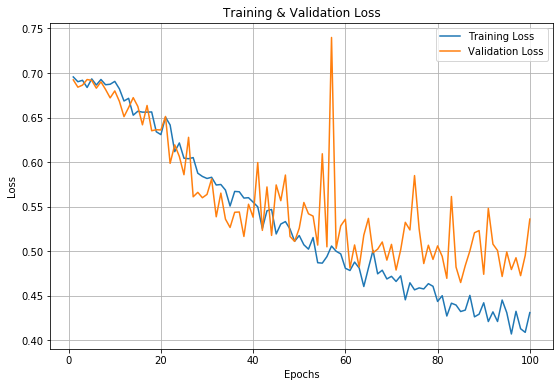

In [0]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* test_generator

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


* Loss & Accuracy

In [0]:
loss, accuracy = model.evaluate_generator(test_generator,
                                          steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.55662
Accuracy = 0.74000


# IV. Model Save & Load to Google Drive

> ## 1) Google Drive Mount

In [0]:
from google.colab import drive

drive.mount('/content/drive')

> ## 2) Model Save

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/models/dogs_and_cats_augmentation.h5')

!ls /content/drive/My\ Drive/Colab\ Notebooks/models

> ## 3) Model Load

In [0]:
from keras.models import load_model

model = load_model('/content/drive/My Drive/Colab Notebooks/models/dogs_and_cats_augmentation.h5')

# 
# 
# 
# The End
# 
# 
# 